/var/folders/z9/75y8h1_97tb63ky_s9t3qf580000gn/T/ipykernel_10716/1068892258.py:13: RuntimeWarning: invalid value encountered in log10
  absmag = hdul[1].data['phot_g_mean_mag'] + 5.0 - (5.0 * np.log10(distance))


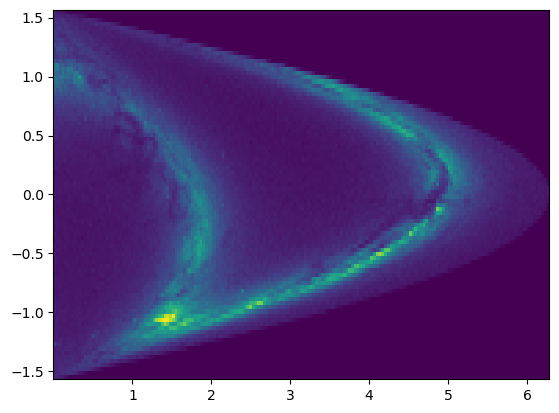

In [4]:
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import math

hdul = fits.open('week2-12.fits.gz')
ra_srad = hdul[1].data['ra'] * (math.pi / 180.0) * np.cos(hdul[1].data['dec'] * (math.pi / 180.0))
dec_srad = hdul[1].data['dec'] * (math.pi / 180.0)
plt.hist2d(ra_srad, dec_srad, bins=(180, 90))

distance = 1000.0 / hdul[1].data['parallax']
absmag = hdul[1].data['phot_g_mean_mag'] + 5.0 - (5.0 * np.log10(distance))

ax = plt.gca()
plt.scatter(distance, absmag)

/var/folders/z9/75y8h1_97tb63ky_s9t3qf580000gn/T/ipykernel_10716/1639999611.py:2: RuntimeWarning: invalid value encountered in log10
  absmag = hdul[1].data['phot_g_mean_mag'] + 5.0 - (5.0 * np.log10(distance))


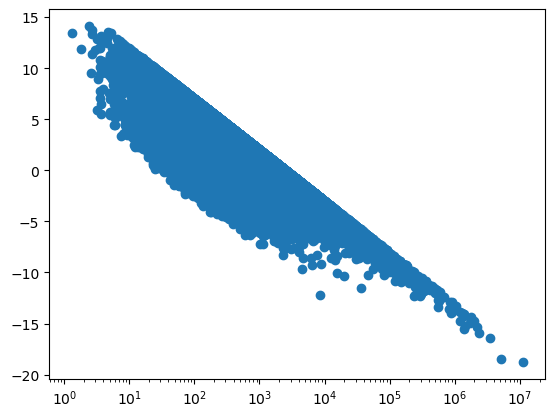

In [5]:
distance = 1000.0 / hdul[1].data['parallax']
absmag = hdul[1].data['phot_g_mean_mag'] + 5.0 - (5.0 * np.log10(distance))

ax = plt.gca()
plt.xscale('log')
plt.scatter(distance, absmag)

<AxesSubplot:>

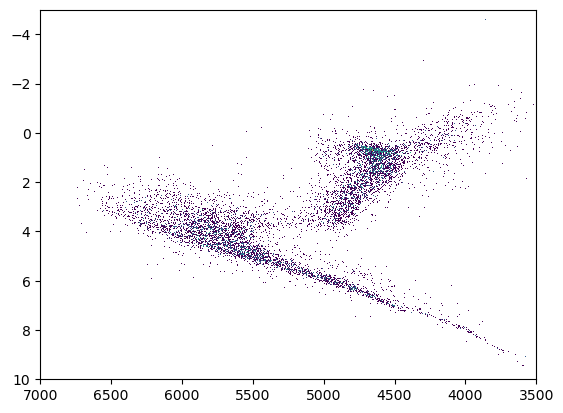

In [6]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import math

hdul = fits.open('week4.fits')
temp = hdul[1].data #array
x = temp['TEFF']
y = temp['GAIAEDR3_PHOT_G_MEAN_MAG'] - temp['GAIAEDR3_DISTANCE_MOD']
temp_hi = temp['Fe_H'] >= 0
plt.hist2d(x[temp_hi], y[temp_hi], bins=(2000, 1000), range = ([[3500, 7000], [-5, 10]]), norm=mcolors.LogNorm())
graph = plt.gca()
graph.invert_xaxis()
graph.invert_yaxis()
graph

In [7]:
# Import the packages:
from astropy.io import fits
import numpy as np
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import CartesianRepresentation, CartesianDifferential

# Open the file
hdul = fits.open('week5.fits.gz')

# Identify the ‘good’ rows that have finite values in all columns:
frows = np.logical_and.reduce((
    np.isfinite(hdul[1].data['parallax']),
    np.isfinite(hdul[1].data['pmra']),
    np.isfinite(hdul[1].data['pmdec']),
    np.isfinite(hdul[1].data['radial_velocity']),
    np.isfinite(hdul[1].data['phot_g_mean_mag']),
    np.isfinite(hdul[1].data['phot_bp_mean_mag']),
    np.isfinite(hdul[1].data['phot_rp_mean_mag'])
))

# Import only the ‘good’ data into the SkyCoord class, and set units.
eq_coords = SkyCoord(frame='icrs',
    ra=hdul[1].data[frows]['ra'] * u.deg,
    dec=hdul[1].data[frows]['dec'] * u.deg,
    distance=(1000.0 / hdul[1].data[frows]['parallax']) * u.parsec,
    pm_ra_cosdec=hdul[1].data[frows]['pmra'] * u.mas / u.yr,
    pm_dec=hdul[1].data[frows]['pmdec'] * u.mas / u.yr,
    radial_velocity=hdul[1].data[frows]['radial_velocity'] * u.km / u.s
)

# Calculate the absolute magnitude and color index:
absmag = hdul[1].data[frows]['phot_g_mean_mag'] + 5.0 - (5.0 * np.log10(eq_coords.distance.to_value(u.pc)))
colour = hdul[1].data[frows]['phot_bp_mean_mag'] - hdul[1].data[frows]['phot_rp_mean_mag']

# Apply a coordinate transformation to galactic position coordinates, and Cartesian velocity coordinates:
gal_coords = eq_coords.galactic
gal_coords.differential_type = CartesianDifferential

In [8]:
gal_coords

<SkyCoord (Galactic): (l, b, distance) in (deg, deg, pc)
    [(335.69844069, -3.43993466, 156.64759362),
     (335.82311933, -3.41508271,  74.63657222),
     (334.46523295, -3.32216503, 209.94991694), ...,
     (351.81858638, -4.22653175, 226.5616491 ),
     (351.75525684, -4.12638358, 144.96237411),
     (351.10419477, -4.23462451, 122.58353425)]
 (U, V, W) in km / s
    [(-23.96688915,  23.22777947, -19.12999562),
     ( -3.09716855, -36.02966253,  -6.81277425),
     (-85.74311645, -52.73628823, -31.01769435), ...,
     ( -5.6582768 , -25.9503501 , -11.47787513),
     ( 30.34032545, -38.0307599 , -14.27554378),
     ( -5.51282549, -25.17688927,  10.63034648)]>

In [9]:
new_v = np.logical_and(gal_coords.W < 300000 * u.km/u.s, gal_coords.W > -11000* u.km/u.s)

<AxesSubplot:>

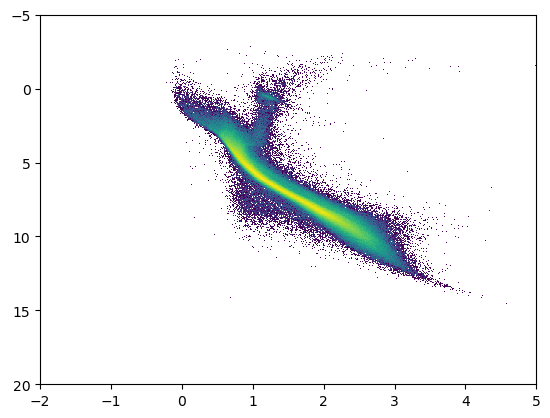

In [10]:
plt.hist2d(colour[new_v], absmag[new_v], bins=(1000, 500), range = ([[-2, 5], [-5, 20]]), norm=mcolors.LogNorm())
graph = plt.gca()
# graph.invert_xaxis()
graph.invert_yaxis()
graph